<a href="https://colab.research.google.com/github/Ramana5564/Geospatial-Data-Analysis-K-Means-Clustering-of-Latitude-and-Longitude-Data/blob/main/Geospatial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geospatial Data Analysis: K-Means Clustering of Latitude and Longitude Data**

---



**Importing Libraries**
---




1.   Pandas
2.   Numpy
3.   Matplotlib
4.   Seaborn
5.   Sklearn



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading DIABETES DATA**
---
---



In [59]:
housing_data=pd.read_csv("/content/housing.csv")
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


* **Dataset contains 20640 rows and 10 columns**

In [60]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**1. Keep only the ‘latitude’ and ‘longitude’ data and drop other columns.**
---
---



In [61]:
housing_data = housing_data[['longitude', 'latitude']]
housing_data

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


**2. Get a rough estimate about optimum number of clusters (k) through 2D visualization.**
---
---



In [62]:
# taking latitude and longitude variables seperately

latitude = housing_data['latitude']
longitude = housing_data['longitude']

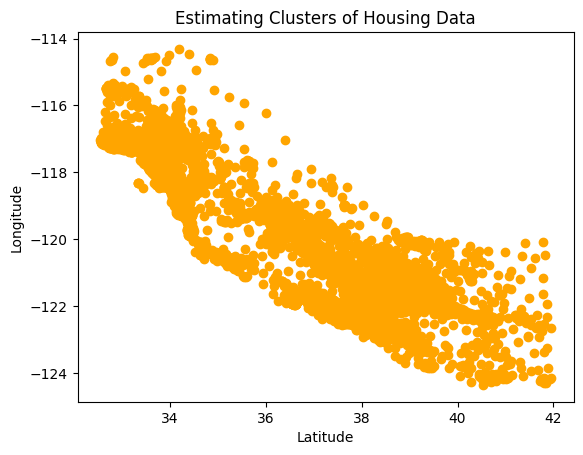

In [63]:
plt.scatter(latitude, longitude, c='orange')
plt.title("Estimating Clusters of Housing Data")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

**3. Get a rough estimate about optimum number of clusters (k) through Elbow method.**
---
---



* **The Elbow Method is a heuristic used to determine the optimal number of clusters (k) in a dataset for K-Means clustering or other clustering algorithms. The basic idea behind this method is to plot the variance or sum of squared distances (inertia) of data points from their assigned cluster centroids as a function of the number of clusters and look for the "elbow point" in the plot.**

In [69]:
ramana0095 = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=95)
    kmeans.fit(housing_data)
    ramana0095.append(kmeans.inertia_)
ramana0095

[182038.8290696513,
 26634.51048366022,
 18745.998165191475,
 14683.748847677165,
 10757.124984304428]

* **Here ramana0095 is Within-Cluster-Sum-Squares(WCSS) which is a cluster , which contains the within cluster sum of squares for the given number in the above loop , here we have given 4 clusters.**

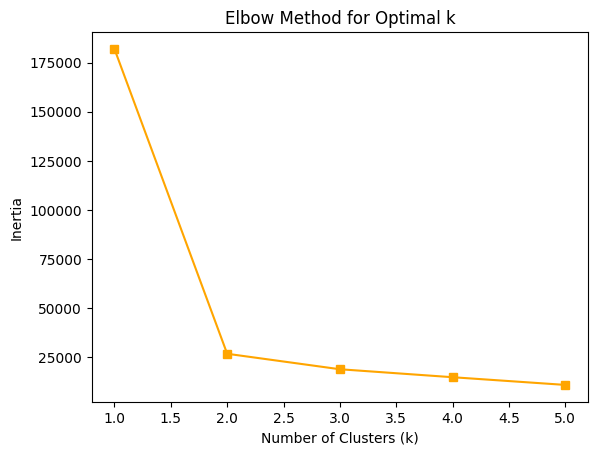

In [70]:
# Plot the Elbow method graph
plt.plot(range(1, 6), ramana0095, marker='s', linestyle='-', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

* **Based on the theory of Elbow Method, at the 2nd point of x-axis we are truly getting the elbow shape, so 2 clusters will be suboptimal option for number of clusters in this.**

**4. Normalize the data.**
---
---



In [66]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_housing_data = scaler.fit_transform(housing_data)

# Display the first few rows of the normalized data
normalized_housing_data = pd.DataFrame(normalized_housing_data, columns=['latitude', 'longitude'])
normalized_housing_data

,latitude,longitude
0,-1.327835,1.052548
1,-1.322844,1.043185
2,-1.332827,1.038503
3,-1.337818,1.038503
4,-1.337818,1.038503
...,...,...
20635,-0.758826,1.801647
20636,-0.818722,1.806329
20637,-0.823713,1.778237
20638,-0.873626,1.778237


**5. Perform K-Means clustering.**
---
---



In [67]:
clusters = 2  # Replace with the optimal k determined from the elbow method
kmeans = KMeans(n_clusters=clusters, random_state=42)
kmeans.fit(normalized_housing_data)

# Add cluster labels to the original dataset
housing_data['cluster'] = kmeans.labels_

# Display the dataset with cluster labels
housing_data

,longitude,latitude,cluster
0,-122.23,37.88,0
1,-122.22,37.86,0
2,-122.24,37.85,0
3,-122.25,37.85,0
4,-122.25,37.85,0
...,...,...,...
20635,-121.09,39.48,0
20636,-121.21,39.49,0
20637,-121.22,39.43,0
20638,-121.32,39.43,0


**6. Visualize the clusters using appropriate color encoding.**
---
---



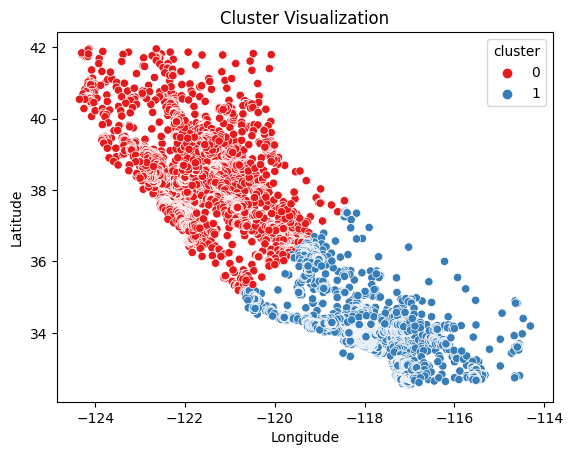

In [78]:
sns.scatterplot(data=housing_data, x='longitude', y='latitude', hue='cluster', palette="Set1")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.show()